In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.style.use('ggplot')

In [2]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install --upgrade patsy

# DATA ACQUISITION

In [2]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_Kprototipe_csv.csv')

In [3]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
       'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_SIN_IVA',
       'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA',
       'DURACIÓN_APROBACIÓN'],
      dtype='object')

In [4]:
df.sample(2)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
7970,46626,1015,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 22,Presupuesto 711,Portal comprador 2,Recibido,TOCINETA AHUMADA X 250g,10.000,10.000,5000.000,5250.000,250,50000.000,52500.000,2021-03-23,3.000,0.000
3669,48014,1570,Alimentos y Bebidas,Aceites y grasas comestibles,Proveedor 68,Presupuesto 270,Portal comprador 2,Recibido,Aceite Frits Bidón x 20 Litros,2.000,2.000,105000.000,124950.000,19950,210000.000,249900.000,2021-07-27,1.000,0.000


## IRRELEVANT COLUMNS

In [5]:
cols_to_drop = ['FECHA_ÚLTIMO_MOVIMIENTO','DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN', 'PRECIO_UNITARIO_+_IVA', 'TOTAL_+_IVA', 'PRESUPUESTO']

In [6]:
df.drop(cols_to_drop, inplace=True, axis=1)

## DF ORIGINAL

In [7]:
df.head(3)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,49561,2582,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.000,0.000,23364.000,4439,46728.000
1,49560,2581,Mercadeo y publicidad,Publicidad,Proveedor 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.000,1.000,1476972.000,280625,1476972.000
2,49559,2580,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.000,0.000,15500.000,0,155000.000


In [8]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'COMPAÑÍA_COMPRADORA', 'ESTADO', 'PRODUCTO_O_SERVICIO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'IVA',
       'TOTAL_SIN_IVA'],
      dtype='object')

## CHECK INSA()

In [9]:
df.isna().sum()

NÚMERO_PEDIDO          0
ORDEN_NÚMERO           0
CATEGORÍA              0
SUBCATEGORÍA           0
PROVEEDOR              0
COMPAÑÍA_COMPRADORA    0
ESTADO                 0
PRODUCTO_O_SERVICIO    0
CANTIDAD_PEDIDA        0
CANTIDAD_RECIBIDA      0
PRECIO_UNITARIO        0
IVA                    0
TOTAL_SIN_IVA          0
dtype: int64

In [10]:
df.select_dtypes('object').nunique()

CATEGORÍA                36
SUBCATEGORÍA            149
PROVEEDOR               405
COMPAÑÍA_COMPRADORA      33
ESTADO                    9
PRODUCTO_O_SERVICIO    3445
dtype: int64

## DISTRIBUTION OF ALL "COMPAÑIAS COMPRADORAS"

In [11]:
df_COMPANHIA_COMPRADORA = pd.DataFrame(df['COMPAÑÍA_COMPRADORA'].value_counts()).reset_index()

In [12]:
df_COMPANHIA_COMPRADORA['Percentage'] = df_COMPANHIA_COMPRADORA['COMPAÑÍA_COMPRADORA'] / df['COMPAÑÍA_COMPRADORA'].value_counts().sum()

In [13]:
df_COMPANHIA_COMPRADORA.rename(columns = {'index':'COMPAÑÍA_COMPRADORA', 'COMPAÑÍA_COMPRADORA':'Total'}, inplace = True)


## CREATE THE DATAFRAME OF "COMPANHIA_COMPRADORA"

In [14]:
df_COMPANHIA_COMPRADORA.head(2)

,COMPAÑÍA_COMPRADORA,Total,Percentage
0,Portal comprador 1,6563,0.293
1,Portal comprador 24,5439,0.243


### Sort values by TOTAL

In [15]:
df_COMPANHIA_COMPRADORA = df_COMPANHIA_COMPRADORA.sort_values('Total', ascending = True).reset_index(drop = True)

In [16]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'COMPAÑÍA_COMPRADORA', 'ESTADO', 'PRODUCTO_O_SERVICIO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'IVA',
       'TOTAL_SIN_IVA'],
      dtype='object')

## GROUP BY COMPAÑÍA_COMPRADORA

In [17]:
# The dataframe
df_COMPANHIA_COMPRADORA = df.groupby('COMPAÑÍA_COMPRADORA').agg({
    'COMPAÑÍA_COMPRADORA': 'count',
    'CANTIDAD_PEDIDA': 'sum',
    'CANTIDAD_RECIBIDA': 'sum',
    'PRECIO_UNITARIO': 'mean',
    'IVA': 'sum',
    'TOTAL_SIN_IVA': 'sum'
    }
).rename(columns = {'COMPAÑÍA_COMPRADORA': 'Total'}).reset_index().sort_values('Total', ascending = True)

In [18]:
df_COMPANHIA_COMPRADORA.sort_values(by='Total', ascending=False).head(2)

,COMPAÑÍA_COMPRADORA,Total,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,Portal comprador 1,6563,432971.200,414527.300,165470.905,166869025,2742179393.000
16,Portal comprador 24,5439,231092.000,231092.000,39930.220,41264145,4293598558.000


## CROSS TAB "CATEGORY"

In [19]:
order_COMPANHIA = df_COMPANHIA_COMPRADORA['COMPAÑÍA_COMPRADORA'].to_list()

In [20]:
order_COMPANHIA.append('All')

In [21]:
(pd.crosstab(df['COMPAÑÍA_COMPRADORA'], df['CATEGORÍA'], margins = True).reindex(order_COMPANHIA, axis = 0).reset_index()).sort_values(by='All', ascending='True').head(7)

CATEGORÍA,COMPAÑÍA_COMPRADORA,Agroindustrial,Alimentos y Bebidas,Almacenamiento y empaques,"Aseo, Cafetería y Oficina",Compras Sostenibles,Construcción y Mantenimiento,Cuidado personal y Belleza,Deporte y recreación,Dotación y elementos de protección personal,...,Salud y Medicina,Servicios Profesionales,Servicios Públicos,Tecnología e información,Textiles,Vehículos y repuestos,"Viajes, Eventos y Entretenimiento",Vigilancia y seguridad,Vigilancia y seguridad industrial,All
0,Portal comprador 9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Portal comprador 33,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Portal comprador 3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Portal comprador 25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,Portal comprador 22,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Portal comprador 19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Portal comprador 17,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
df_CATEGORIA = pd.crosstab(df['COMPAÑÍA_COMPRADORA'], df['CATEGORÍA'], margins = True).reindex(order_COMPANHIA, axis = 0).reset_index()

In [23]:
# Remove index name
df_CATEGORIA.columns.name = None
df_CATEGORIA.head(3)

,COMPAÑÍA_COMPRADORA,Agroindustrial,Alimentos y Bebidas,Almacenamiento y empaques,"Aseo, Cafetería y Oficina",Compras Sostenibles,Construcción y Mantenimiento,Cuidado personal y Belleza,Deporte y recreación,Dotación y elementos de protección personal,...,Salud y Medicina,Servicios Profesionales,Servicios Públicos,Tecnología e información,Textiles,Vehículos y repuestos,"Viajes, Eventos y Entretenimiento",Vigilancia y seguridad,Vigilancia y seguridad industrial,All
0,Portal comprador 9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Portal comprador 33,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Portal comprador 3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## GET POSITION OF CATEGORICAL COLS

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NÚMERO_PEDIDO        22392 non-null  int64  
 1   ORDEN_NÚMERO         22392 non-null  int64  
 2   CATEGORÍA            22392 non-null  object 
 3   SUBCATEGORÍA         22392 non-null  object 
 4   PROVEEDOR            22392 non-null  object 
 5   COMPAÑÍA_COMPRADORA  22392 non-null  object 
 6   ESTADO               22392 non-null  object 
 7   PRODUCTO_O_SERVICIO  22392 non-null  object 
 8   CANTIDAD_PEDIDA      22392 non-null  float64
 9   CANTIDAD_RECIBIDA    22392 non-null  float64
 10  PRECIO_UNITARIO      22392 non-null  float64
 11  IVA                  22392 non-null  int64  
 12  TOTAL_SIN_IVA        22392 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 2.2+ MB


In [25]:
[df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

[2, 3, 4, 5, 6, 7]

In [26]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

In [27]:
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'COMPAÑÍA_COMPRADORA', 'ESTADO', 'PRODUCTO_O_SERVICIO']
Categorical columns position  : [2, 3, 4, 5, 6, 7]


## CONVERT DF TO MATRIX WITH NUMPY

In [28]:
dfMatrix = df.to_numpy()
dfMatrix

array([[49561, 2582, 'Eléctricos y Electrónicos', ..., 23364.0, 4439,
        46728.0],
       [49560, 2581, 'Mercadeo y publicidad', ..., 1476972.0, 280625,
        1476972.0],
       [49559, 2580, 'Alimentos y Bebidas', ..., 15500.0, 0, 155000.0],
       ...,
       [2, 2, 'Moda y accesorios', ..., 29412.0, 5588, 88235.0],
       [1, 1, 'Moda y accesorios', ..., 29412.0, 5588, 117647.0],
       [1, 1, 'Aseo, Cafetería y Oficina', ..., 33613.0, 6387, 168067.0]],
      dtype=object)

## OPTIMAL K USING ELBOW METHOD

In [31]:
cost = []
for cluster in range(2, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6


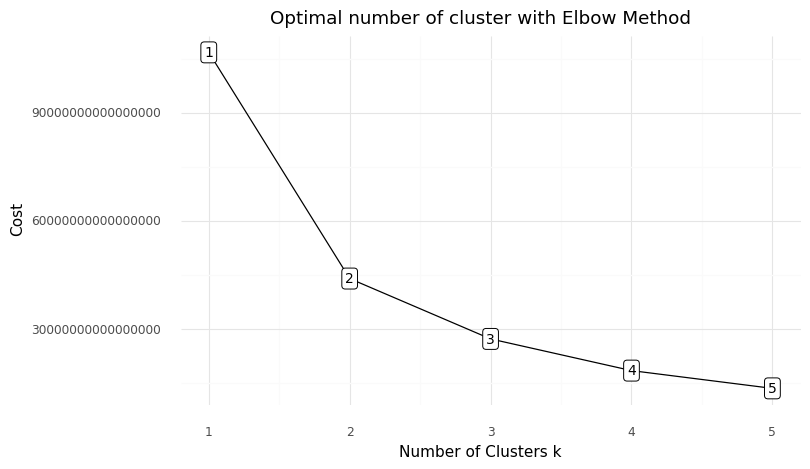

<ggplot: (-9223371916297681204)>

In [40]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

## FTI MODEL WITH K CLUSTER

In [29]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

### CENTROIDS

In [33]:
# Cluster centorid
kprototype.cluster_centroids_

array([['35110.93985601216', '707.6979832759469', '196.3368345034208',
        '49.022629343111404', '60042.934400572376', '9631.38671019094',
        '407609.97088941553', 'Alimentos y Bebidas',
        'Seguridad y protección personal', 'Proveedor 301',
        'Portal comprador 1', 'Recibido',
        '6 Bota de seguridad media caña dielectrica con puntera de seguridad'],
       ['47255.5', '1216.5', '8.5', '1.4551915228366852e-11',
        '31731777.0', '3158067.5', '270475610.0',
        'Construcción y Mantenimiento',
        'Servicios de mantenimiento y reparaciones', 'Proveedor 20',
        'Portal comprador 1', 'Cancelado',
        'Servicios de aseo y mantenimiento'],
       ['42434.88888888889', '1126.6666666666667', '494.44444444445094',
        '467.7037037037091', '9351504.037037037', '1325871.0',
        '38413580.59259259', 'Construcción y Mantenimiento',
        'Servicios de mantenimiento y reparaciones', 'Proveedor 301',
        'Portal comprador 1', 'Recibido',
   

N_ITER

In [34]:

# Check the iteration of the clusters created
kprototype.n_iter_

15

### COST_

In [35]:

# Check the cost of the clusters created
kprototype.cost_

4.406210933622569e+16

## ADD THE CLUSTER TO THE DF

In [34]:
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

In [38]:
df.head(4)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA,Cluster Labels,Segment
0,49561,2582,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.000,0.000,23364.000,4439,46728.000,0,First
1,49560,2581,Mercadeo y publicidad,Publicidad,Proveedor 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.000,1.000,1476972.000,280625,1476972.000,0,First
2,49559,2580,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Portal comprador 1,Orden en Proceso,Lasagna,10.000,0.000,15500.000,0,155000.000,0,First
3,49558,1892,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,50.000,0.000,22000.000,0,1100000.000,0,First


In [39]:
#df.to_csv("Kprototype_clusters_3:Compahnia.csv")

## ORDER CLUSTER

In [38]:
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third'])

## CLUSTER INTERPRETATION

In [39]:
# Cluster interpretation
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df.groupby('Segment').agg(
    {
        'Total':'count',
        'COMPAÑÍA_COMPRADORA': lambda x: x.value_counts().index[0],
        'CATEGORÍA':lambda x: x.value_counts().index[0],
        'CANTIDAD_PEDIDA': 'sum',
        'CANTIDAD_RECIBIDA': 'sum',
        'PRECIO_UNITARIO': 'mean',
        'IVA': 'sum',
        'TOTAL_SIN_IVA': 'sum'

    }
).reset_index()

,Segment,Total,COMPAÑÍA_COMPRADORA,CATEGORÍA,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,IVA,TOTAL_SIN_IVA
0,First,22363,Portal comprador 1,Alimentos y Bebidas,4390680.630,1096293.060,60042.934,215386701,9115381779.000
1,Second,2,Portal comprador 1,Construcción y Mantenimiento,17.000,0.000,31731777.000,6316135,540951220.000
2,Third,27,Portal comprador 1,Construcción y Mantenimiento,13350.000,12628.000,9351504.037,35798517,1037166676.000


# FAMD

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (0.23% inertia)', ylabel='Component 1 (0.19% inertia)'>

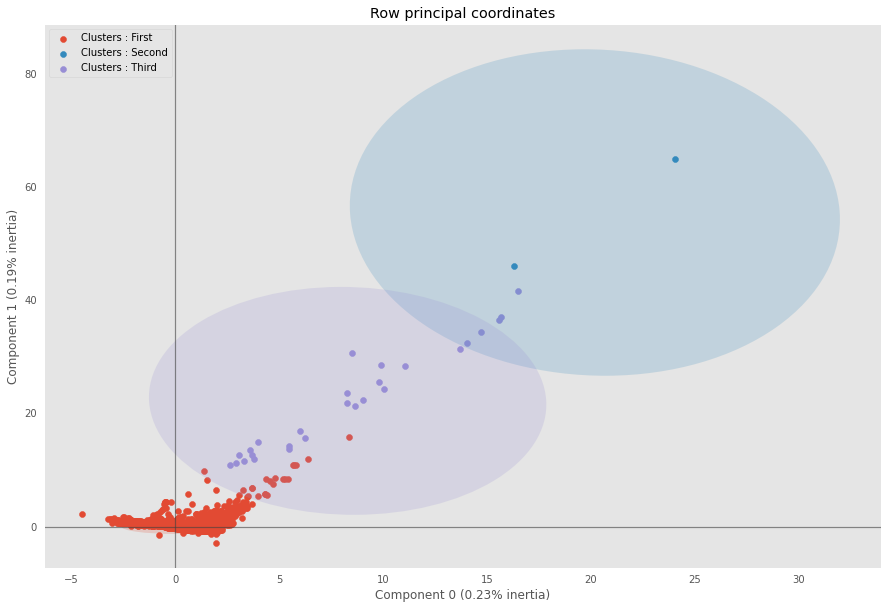

In [37]:
from prince import FAMD

X=pd.read_csv("Kprototype_clusters_3:Compahnia.csv")

famd = FAMD(n_components =2, n_iter = 3, random_state = 101)

famd.fit(X)
famd.transform(X)
famd.plot_row_coordinates(X,figsize=(15, 10),color_labels=['Clusters : {}'.format(t) for t in X['Segment']] )